In [1]:
# import the opencv library
import cv2
import numpy as np

In [2]:
# define a video capture object
vid = cv2.VideoCapture(0)

In [19]:
ret, frame = vid.read()

In [20]:
from PIL import Image
rgb_image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
im = Image.fromarray(rgb_image, 'RGB')

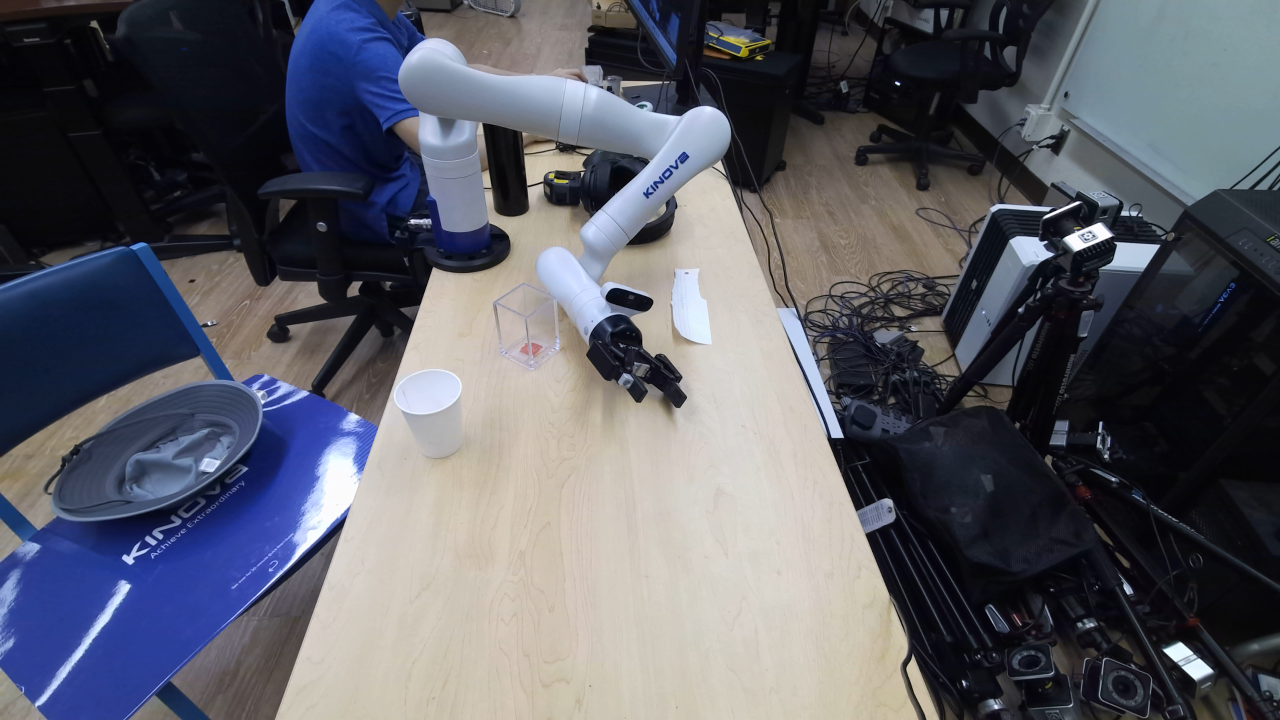

In [21]:
im

In [22]:
lower_blue = np.array([150, 50, 50])   
upper_blue = np.array([179, 255, 255])
hsv_image = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)  

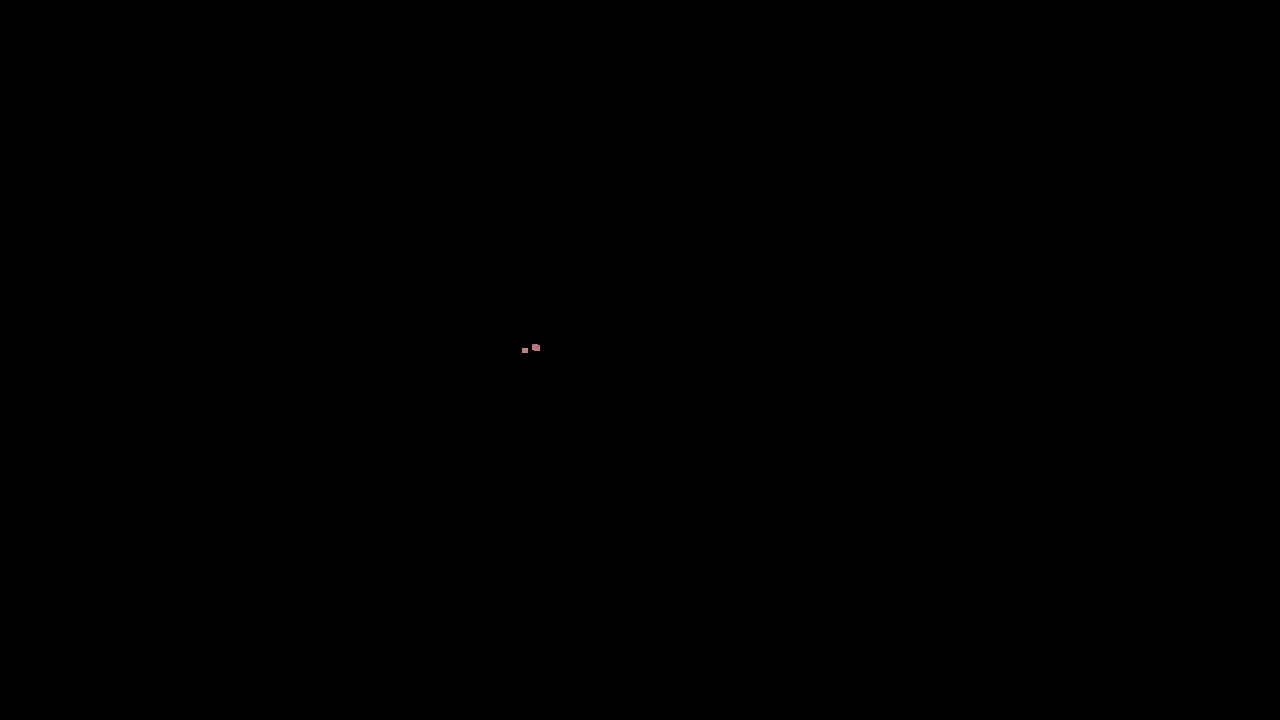

In [25]:
filtered_image = cv2.bitwise_and(rgb_image, rgb_image, mask=mask)
im = Image.fromarray(filtered_image)
im


In [26]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Find the centroid of the largest contour (assumed to be the red color)
if len(contours) > 0:
    largest_contour = max(contours, key=cv2.contourArea)
    M = cv2.moments(largest_contour)
    center_x = int(M['m10'] / M['m00'])
    center_y = int(M['m01'] / M['m00'])
    print("Center Position: ({}, {})".format(center_x, center_y))

Center Position: (535, 347)


In [6]:
width  = vid.get(cv2.CAP_PROP_FRAME_WIDTH   )   # float `width`
height = vid.get(cv2.CAP_PROP_FRAME_HEIGHT  )  # float `height`

In [7]:
print("width", width, "height", height)

width 1280.0 height 720.0
